## Predicting house prices using Linear Regression and Decision Tree models

In [1]:
# Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [5]:
#Load the Dataset

In [7]:
housedf = pd.read_csv ("Housing.csv")

In [10]:
# Load the first five rows of the dataset
housedf.head (5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
# Encode categorical variables

In [23]:
label_encoder = {}
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
        le = LabelEncoder()
        housedf[col] = le.fit_transform(housedf[col])
        label_encoder[col] = le

In [24]:
# Feature selection and the target variable

In [25]:
X = housedf[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = housedf['price']  #The target variable

In [26]:
#Spliting the data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

In [31]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
#Make Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)


In [36]:
# Evaluate both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [37]:
# Print evaluation metrics for Linear Regression
print("Linear Regression Performance:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("R-Squared (R2):", r2_linear)

Linear Regression Performance:
Mean Squared Error (MSE): 1771751116594.0347
Root Mean Squared Error (RMSE): 1331071.4167895105
R-Squared (R2): 0.6494754192267804


In [38]:
# Print evaluation metrics for Decision Tree Regression
print("\nDecision Tree Regression Performance:")
print("Mean Squared Error (MSE):", mse_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("R-Squared (R2):", r2_tree)



Decision Tree Regression Performance:
Mean Squared Error (MSE): 2688177649082.569
Root Mean Squared Error (RMSE): 1639566.2990811225
R-Squared (R2): 0.4681689010023007


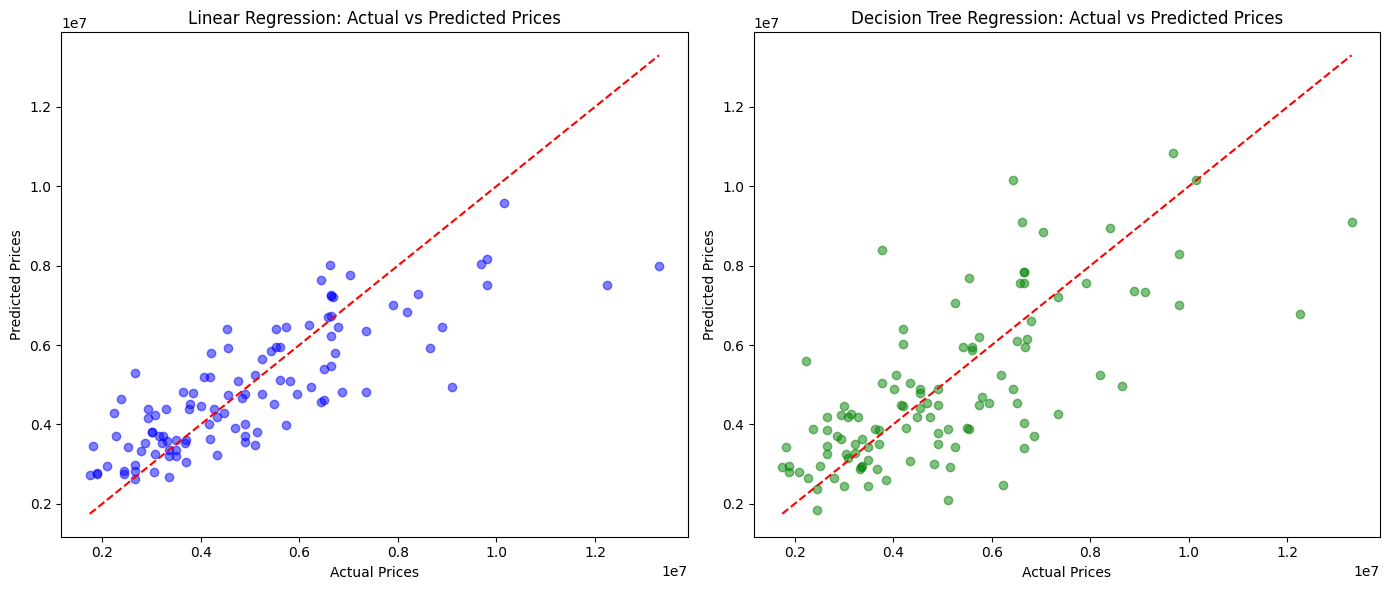

In [40]:
# Visualize actual vs predicted prices for both models
plt.figure(figsize=(14, 6))

# Subplot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Subplot for Decision Tree Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Decision Tree Regression: Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.show()
